<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Classification_07_01_2020_tvt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification 07/01/2020 Exam

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
random_state = 42
np.random.seed(random_state)

## 1  A pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any

In [72]:
data = pd.read_csv("exam_2020_01_07_data.csv")
data.head()

,C00,C01,C02,C03,C04,Class
0,1.855416,0.466367,-0.176765,1.546514,0.149219,c
1,-0.107873,-0.136792,1.551591,-0.813810,1.357674,a
2,2.712560,-0.495846,1.397077,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


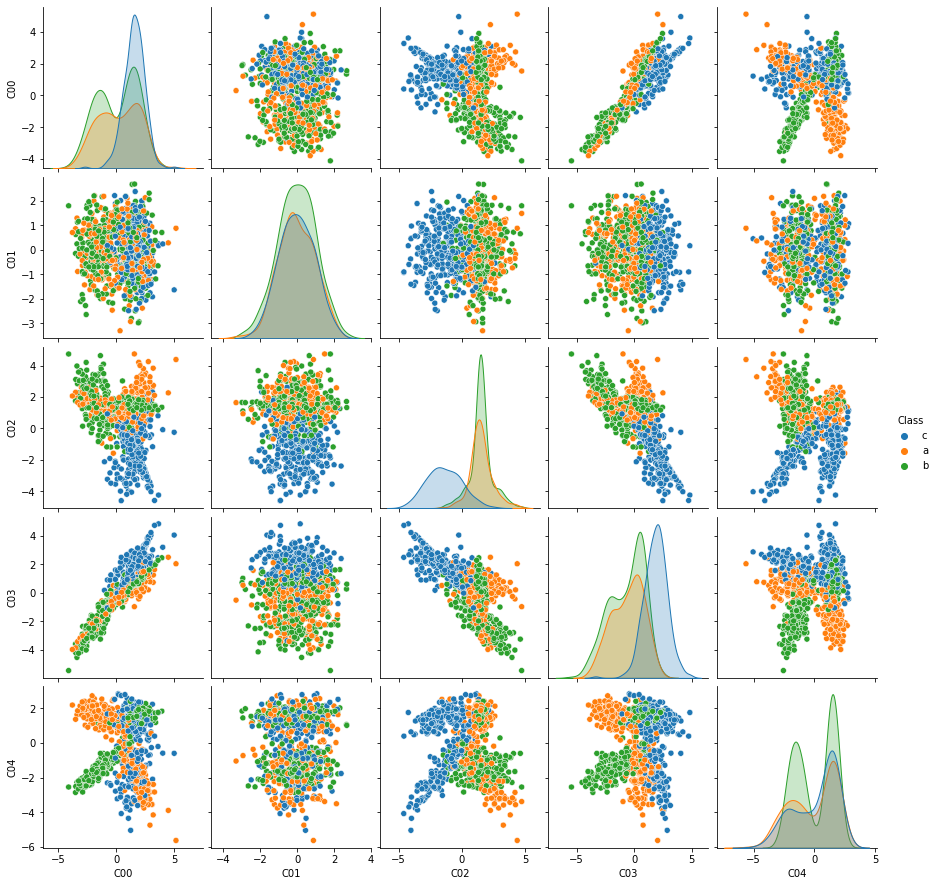

In [73]:
sns.pairplot(data,hue = "Class")

The column c1 seems to be only noise with respect to the target. I will drop it.

In [74]:
df = data.drop("C01",axis = 1)

## 2. Classification model using a method of your choice with the schema "train-validationtest" exploring an appropriate range of parameter values

In [75]:
 # Divide our data between feature matrix and class labels
X = df.drop("Class", axis = 1)
y = df["Class"]

In [76]:
 # We will use a 2/3 ratio between the training and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 2/3,random_state = random_state)
print(f"We have {Xtrain.shape[0]} items in our training set")
print(f"We have {Xtest.shape[0]} items in our test set")


We have 666 items in our training set
We have 334 items in our test set


As an estimator I will use a Decision Tree Classifier

In [77]:
dt = DecisionTreeClassifier(criterion="entropy", random_state = random_state)
dt.fit(Xtrain, ytrain)

# Prediction and test set accuracy results
train_set_prediction = dt.predict(Xtrain)
train_set_accuracy = accuracy_score(ytrain, train_set_prediction) * 100
print(f"The accuracy on the training set was {train_set_accuracy:.2f}%")

The accuracy on the training set was 100.00%


To have a more meaningful result, we will try it on the test set as well, to obtain a “baseline” value for the performance of our classifier

In [78]:
test_set_prediction = dt.predict(Xtest)
test_set_accuracy = accuracy_score(ytest, test_set_prediction) * 100
print(f"The accuracy on the test set was {test_set_accuracy:.2f}%")


The accuracy on the test set was 85.33%


Since our assignment is to use the train-validation-test schema, we will split once more the test data into a test and validation set


In [79]:
Xtrain_t, Xval, ytrain_t, yval = train_test_split(Xtest, ytest, random_state = random_state)
print(f"We have {Xtest.shape[0]} items in our test set")
print(f"We have {Xval.shape[0]} items in our validation set")

We have 334 items in our test set
We have 84 items in our validation set


Now we can save the depth of the tree with default hyperparameters. This way, we can vary the depths in order to see what is the best fit for our data

In [80]:
default_tree_depth = dt.get_depth()
depths = range(1, default_tree_depth + 1)

In [81]:
scores = []
for depth in depths:
  # Create a Decision Tree with limited depth
  dt = DecisionTreeClassifier(criterion="entropy", max_depth = depth, random_state = random_state)
  # Fit it on our test data
  dt.fit(Xtrain_t, ytrain_t)
  # Try predicting the class and save the accuracy of this classifier
  y_pred_val = dt.predict(Xval)
  score = accuracy_score(yval, y_pred_val) * 100
  scores.append(score)


## 3.  the optimal parameter(s) 

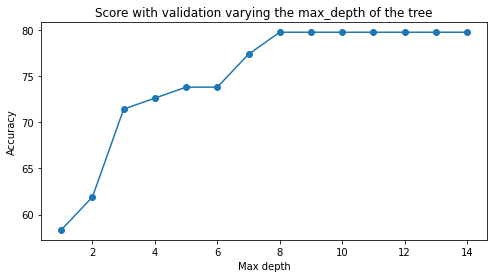

In [82]:
plt.figure(figsize=(8,4))
plt.plot(depths, scores, '-o')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title("Score with validation varying the max_depth of the tree")
plt.show();


The best hyperparameters configuration is the one that miximises the accuracy

In [83]:
best_depth = depths[np.argmax(scores)]
# We must remove 1 from best depth in order to obtain the correct score, as its "zero" value is 1
print("The best depth parameter was", best_depth, "with an accuracy of",np.round(scores[best_depth-1],4),"%")

The best depth parameter was 8 with an accuracy of 79.7619 %


We now test our tuned hyperparameter on the old training data and compute its accuracy

In [84]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = best_depth, random_state = random_state)
dt.fit(Xtrain, ytrain)
y_pred = dt.predict(Xtest)
print(f"The accuracy of the tuned Decision Tree is {accuracy_score(ytest,y_pred) * 100:.2f}%")

The accuracy of the tuned Decision Tree is 84.13%


In [85]:
print(f"The depth of the original tree was {default_tree_depth} and it is now {best_depth}")


The depth of the original tree was 14 and it is now 8


## 4. A scatter plot of the test set using a pair of attributes of your choice with the class as colour 


<ipython-input-86-eb4c325b7f5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["y_pred"] = y_pred


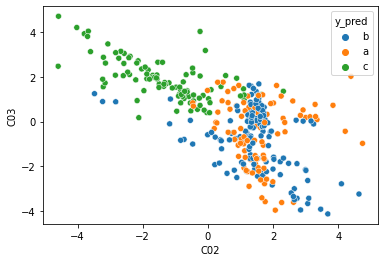

In [86]:
attributes = ['C02', 'C03']
# We want to plot the test set, so we need to add the target column
# to the dataframe in order to use it as hue
df_test = Xtest[["C02","C03"]]
df_test["y_pred"] = y_pred
sns.scatterplot(x = attributes[0], y = attributes[1], data = df_test, hue= 'y_pred')

## 5.  … and the good/bad prediction as the point style (5pt)


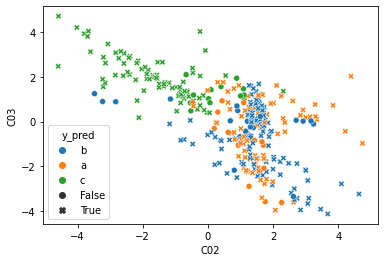

In [87]:
sns.scatterplot(x = attributes[0], y = attributes[1], data = df_test, hue= 'y_pred', style = ytest == df_test["y_pred"])